## 박스플롯을 이용한 연속변수의 이상값 식별
- 사분위범위(IQR): 1사분위수 ~ 3사분위수
- 이상값: 1사분위수 - (1.5 * IQR) / (1.5 * IQR) + 3사분위수
- 밑에서부터 1,2,3,4... 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

nls97=pd.read_csv('C:/data-cleansing-main/Chapter05/data/nls97.csv')
nls97.set_index('personid',inplace=True)
covidtotals=pd.read_csv('C:/data-cleansing-main/Chapter05/data/covidtotals.csv',parse_dates=['lastdate'])
covidtotals.set_index('iso_code',inplace=True)

### 각종 박스플롯 그려보기

In [2]:
nls97.satverbal.describe()

count    1406.000000
mean      499.724040
std       112.166256
min        14.000000
25%       430.000000
50%       500.000000
75%       570.000000
max       800.000000
Name: satverbal, dtype: float64

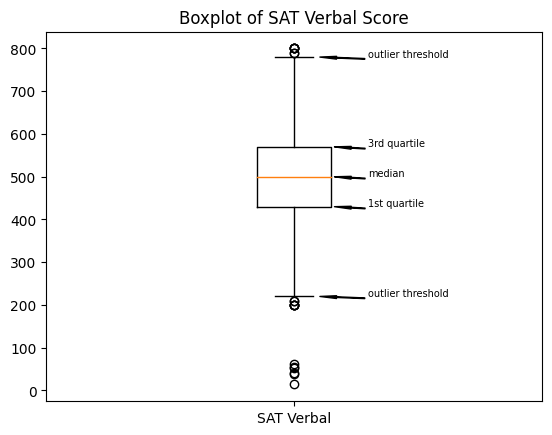

In [4]:
# SAT 시험의 언어 점수를 박스플롯으로 나타내기
plt.boxplot(nls97.satverbal.dropna(),labels=['SAT Verbal'])
# annotate: 텍스트와 기호 추가
plt.annotate('outlier threshold', xy=(1.05,780), xytext=(1.15,780), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('3rd quartile', xy=(1.08,570), xytext=(1.15,570), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('median', xy=(1.08,500), xytext=(1.15,500), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('1st quartile', xy=(1.08,430), xytext=(1.15,430), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('outlier threshold', xy=(1.05,220), xytext=(1.15,220), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))

plt.title("Boxplot of SAT Verbal Score")
plt.show()

- 언어능력 점수의 박스플롯은 정규분포에 가깝다. 중앙값이 사분위범위의 가운데에 있으므로! 이는 기술 통계를 보고도 알 수 있는 부분
- 아랫쪽 이상값이 위쪽 이상값보다 많이 떨어져있다. 확인 필요

In [5]:
# 근무 주 수로 박스플롯 그려보기
weeksworked=nls97.loc[:,['highestdegree','weeksworked16','weeksworked17']]
weeksworked.describe()

,weeksworked16,weeksworked17
count,7068.000000,6670.000000
mean,39.127476,39.016642
std,21.336629,19.465974
min,0.000000,0.000000
25%,23.000000,37.000000
50%,53.000000,49.000000
75%,53.000000,52.000000
max,53.000000,52.000000


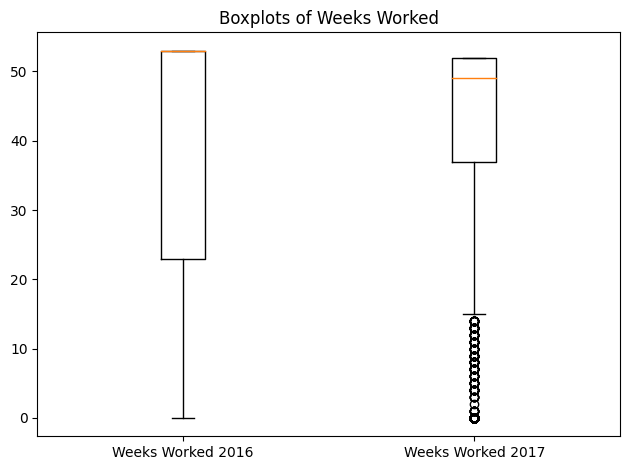

In [8]:
plt.boxplot([weeksworked.weeksworked16.dropna(),weeksworked.weeksworked17.dropna()],            # 두 변수를 나란히 나타낸 박스플롯도 가능
            labels=['Weeks Worked 2016','Weeks Worked 2017'])
plt.title("Boxplots of Weeks Worked")
plt.tight_layout()
plt.show()

In [9]:
totvars = ['total_cases','total_deaths','total_cases_pm','total_deaths_pm']
totvarslabels = ['cases','deaths','cases per million','deaths per million']
covidtotalsonly = covidtotals[totvars]
covidtotalsonly.describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
count,2.090000e+02,209.000000,209.000000,209.000000
mean,6.075741e+04,2702.952153,2297.022144,73.636522
std,2.724401e+05,11894.963052,4039.840203,156.341672
min,3.000000e+00,0.000000,1.229000,0.000000
25%,3.420000e+02,9.000000,202.834000,2.809000
50%,2.820000e+03,53.000000,868.866000,15.216000
75%,2.561100e+04,386.000000,2784.865000,58.374000
max,3.247684e+06,134814.000000,35795.159000,1237.551000


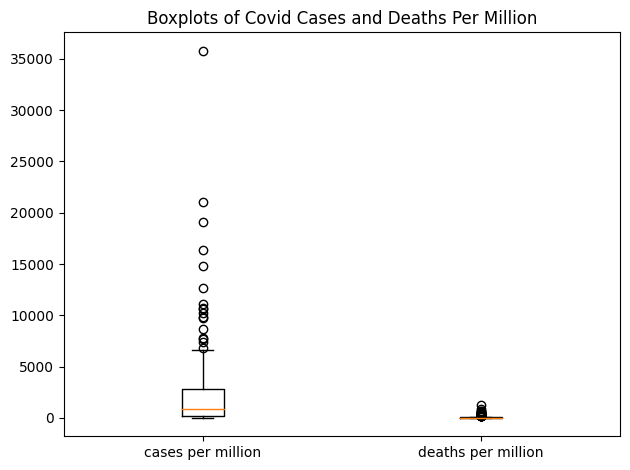

In [10]:
# 백만 명당 확진자 수에 대한 박스플롯
fig, ax=plt.subplots()
plt.title("Boxplots of Covid Cases and Deaths Per Million")
ax.boxplot([covidtotalsonly.total_cases_pm,covidtotalsonly.total_deaths_pm],
           labels=['cases per million','deaths per million'])
plt.tight_layout()
plt.show()

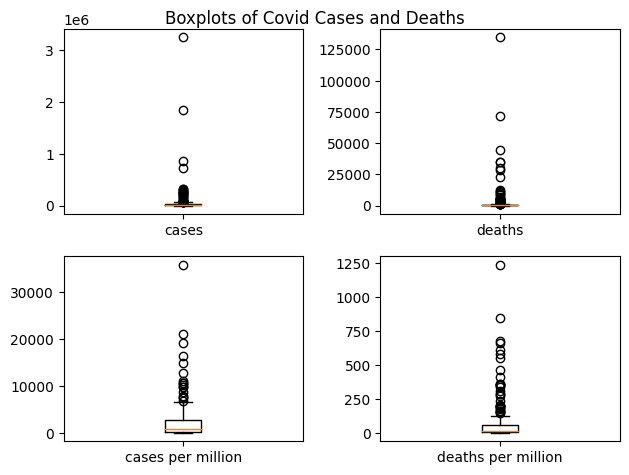

In [11]:
fig, axes=plt.subplots(2,2)
fig.suptitle("Boxplots of Covid Cases and Deaths")
axes=axes.ravel()       # 뭐징
for j, ax in enumerate(axes):
    ax.boxplot(covidtotalsonly.iloc[:,j],
               labels=[totvarslabels[j]])

plt.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()

> 박스플롯은 이해하기 쉬우면서 동시에 변수의 분포를 매우 잘 표현한다.